In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func
from dateutil.relativedelta import relativedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
connection=engine.connect()
# reflect the tables
hawaii_measurement_df=pd.read_sql('''SELECT * FROM measurement''',connection)
hawaii_station_df=pd.read_sql('''SELECT * FROM station''',connection)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station=Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print(recent_date)

2017-08-23


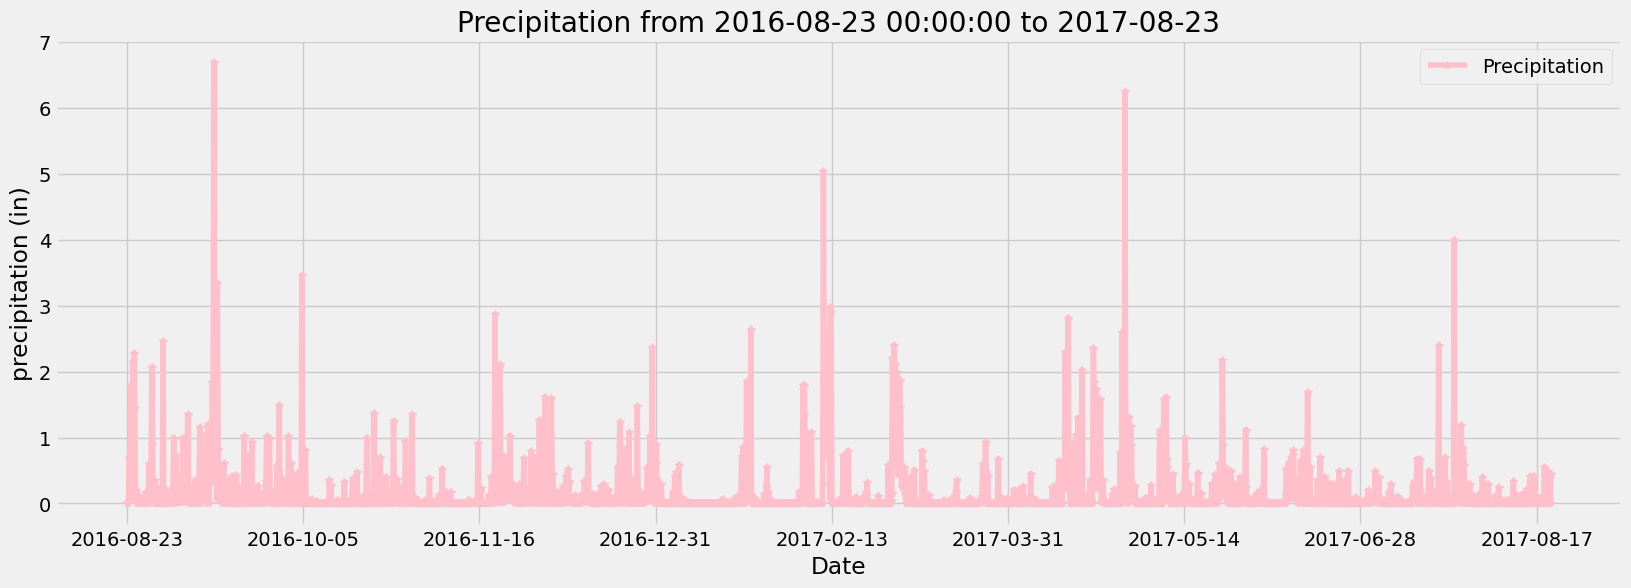

<Figure size 640x480 with 0 Axes>

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
year_before=year_before_temp.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= year_before).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["date", "precipitation"])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df=pd.DataFrame(results_dict)
results_df=results_df.dropna()
# Sort the dataframe by date
results_df=results_df.sort_values(by=['Date']).set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(kind="line", figsize=(18,6), color="pink", marker="*", linestyle="solid")
plt.title("Precipitation from {} to {}".format(query_date, recent_date))
plt.xlabel("Date")
plt.ylabel("precipitation (in)")
plt.legend(loc = "upper right")
plt.show()

plt.savefig("Precipitation.png")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(measurement.station).group_by(measurement.station).count()
total_stations

9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station=most_active_stations[0][0]
temperatures_active_station=session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station==active_station).all()
temperatures_active_station

[(54.0, 85.0, 71.66378066378067)]

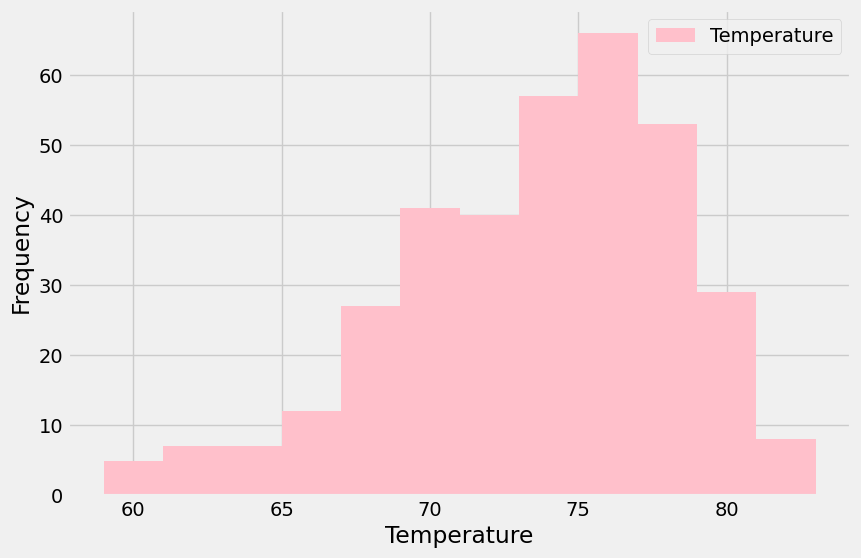

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_before
temperatures_active_station_12months=session.query(measurement.date,measurement.tobs).\
    filter(measurement.date>=year_before).filter(measurement.station==active_station).all()

measurement_date_list2=[]
measurement_tobs_list=[]
for date_temperatures in temperatures_active_station_12months:
    (measurement_date2,measurement_tobs)=date_temperatures
    measurement_date_list2.append(measurement_date2)
    measurement_tobs_list.append(measurement_tobs)
results_dict2={'Date':measurement_date_list2,'Temperature':measurement_tobs_list}

temperatures_df=pd.DataFrame(results_dict2)
temperatures_df=temperatures_df.dropna()
temperatures_df.plot(kind='hist',bins=12, color="pink", figsize=(9,6))

plt.xlabel("Temperature")
plt.ylabel("Frequency")


plt.savefig("Temperatures_mostactive_station.png")
plt.show()


# Close Session

In [52]:
# Close Session
session.close()